In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
city_data = pd.read_csv('D:\Data Analyst - Udacity\Datasets\city_data.csv')
city_list = pd.read_csv('D:\Data Analyst - Udacity\Datasets\city_list.csv')
global_data = pd.read_csv('D:\Data Analyst - Udacity\Datasets\global_data.csv')
city_data.head()


,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [2]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [3]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
city_filtered = pd.read_csv('D:\Data Analyst - Udacity\Datasets\city_filtered.csv')
city_filtered.head()

,year,city,country,avg_temp
0,1796,Hyderabad,India,26.53
1,1797,Hyderabad,India,27.48
2,1798,Hyderabad,India,26.20
3,1799,Hyderabad,India,26.84
4,1800,Hyderabad,India,26.88


In [5]:
#merge global_data with city_filtered data

city_filtered_merge = pd.merge(city_filtered, global_data, on = 'year', how = 'inner')
print (city_filtered_merge.head())
city_filtered_merge = city_filtered_merge.rename(columns = {'avg_temp_x' : 'city_avg_temp', 'avg_temp_y' : 'global_avg_temp' })
print (city_filtered_merge.head())

   year       city country  avg_temp_x  avg_temp_y
0  1796  Hyderabad   India       26.53        8.27
1  1797  Hyderabad   India       27.48        8.51
2  1798  Hyderabad   India       26.20        8.67
3  1799  Hyderabad   India       26.84        8.51
4  1800  Hyderabad   India       26.88        8.48
   year       city country  city_avg_temp  global_avg_temp
0  1796  Hyderabad   India          26.53             8.27
1  1797  Hyderabad   India          27.48             8.51
2  1798  Hyderabad   India          26.20             8.67
3  1799  Hyderabad   India          26.84             8.51
4  1800  Hyderabad   India          26.88             8.48


In [6]:
#checeking the missing values and data types
city_filtered_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             218 non-null    int64  
 1   city             218 non-null    object 
 2   country          218 non-null    object 
 3   city_avg_temp    211 non-null    float64
 4   global_avg_temp  218 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.2+ KB


In [7]:
# filling missing values with mean values in city_avg_temp column
city_filtered_merge['city_avg_temp'].fillna(city_filtered_merge['city_avg_temp'].mean(), inplace=True)

#altering the year datatype
#city_filtered_merge['year']= pd.to_datetime(city_filtered_merge['year'])

In [8]:
city_filtered_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             218 non-null    int64  
 1   city             218 non-null    object 
 2   country          218 non-null    object 
 3   city_avg_temp    218 non-null    float64
 4   global_avg_temp  218 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.2+ KB


In [9]:
print (city_filtered_merge.head())
print (city_filtered_merge.tail())

   year       city country  city_avg_temp  global_avg_temp
0  1796  Hyderabad   India          26.53             8.27
1  1797  Hyderabad   India          27.48             8.51
2  1798  Hyderabad   India          26.20             8.67
3  1799  Hyderabad   India          26.84             8.51
4  1800  Hyderabad   India          26.88             8.48
     year       city country  city_avg_temp  global_avg_temp
213  2009  Hyderabad   India          28.03             9.51
214  2010  Hyderabad   India          27.69             9.70
215  2011  Hyderabad   India          27.41             9.52
216  2012  Hyderabad   India          28.02             9.51
217  2013  Hyderabad   India          28.85             9.61


In [10]:
# defining moving averages function

def moving_averages (data= None, window_size= None):
    mov_avg = data.rolling(window=window_size, center=False, on='year').mean().dropna()
    
    return(mov_avg)

roll_window_size = 10

mov_avg = moving_averages(data=city_filtered_merge, window_size=roll_window_size)
print(mov_avg.head())

    year  city_avg_temp  global_avg_temp
9   1805      26.931000            8.551
10  1806      26.967000            8.567
11  1807      26.834000            8.544
12  1808      26.900156            8.440
13  1809      26.902313            8.297


In [11]:
print (mov_avg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 9 to 217
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             209 non-null    int64  
 1   city_avg_temp    209 non-null    float64
 2   global_avg_temp  209 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.5 KB
None


Text(0.5, 1.0, 'Line Chart of Hyderabad versus Global temperatures (10 year moving avg)')

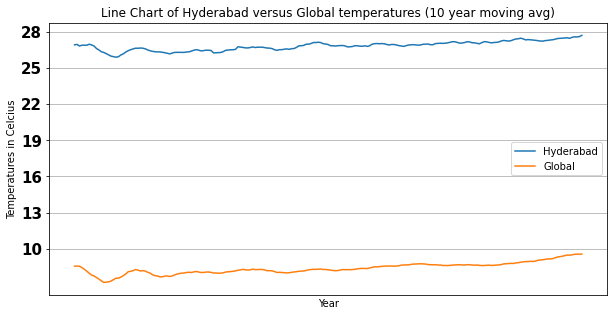

In [12]:
min_year = mov_avg['year'].iloc[0]
max_year = mov_avg['year'].iloc[208]

plt.figure(figsize=(10,5))
plt.xticks(np.arange(1796, 2013, 30), fontsize=15, fontweight='bold')
plt.yticks(np.arange(10,40,3), fontsize=15, fontweight='bold')

plt.grid()
plt.plot(mov_avg['city_avg_temp'], label='Hyderabad')
plt.plot(mov_avg['global_avg_temp'], label='Global')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Temperatures in Celcius')
plt.title("Line Chart of Hyderabad versus Global temperatures ({} year moving avg)".format(roll_window_size)) 

Text(0.5, 1.0, 'Line Chart of Hydebrad Vs Global Temperatures (10 year moving averags)')

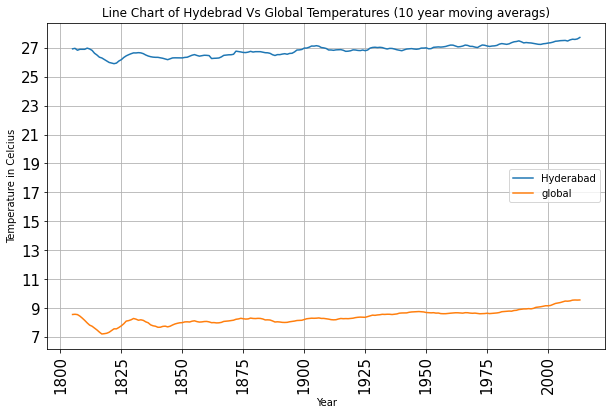

In [13]:
plt.figure(figsize=(10,6))
x1=mov_avg['year']
y1=mov_avg['city_avg_temp']
y2 = mov_avg['global_avg_temp']
plt.xticks(np.arange(1750, 2015, 25),fontsize=15, fontweight=10, rotation='vertical')
plt.yticks(np.arange(1,30,2), fontsize=15, fontweight=10)
plt.grid()
plt.plot(x1, y1, label="Hyderabad")
plt.plot(x1,y2, label='global')
plt.plot
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Temperature in Celcius')
plt.title("Line Chart of Hydebrad Vs Global Temperatures ({} year moving averags)".format(roll_window_size))

In [14]:
mov_avg.describe()

,year,city_avg_temp,global_avg_temp
count,209.000000,209.000000,209.000000
mean,1909.000000,26.839856,8.376301
std,60.477268,0.379773,0.472061
min,1805.000000,25.906000,7.203000
25%,1857.000000,26.532000,8.070000
50%,1909.000000,26.865000,8.288000
75%,1961.000000,27.105000,8.658000
max,2013.000000,27.719000,9.556000
